#Superstore Visualization PART 3 Time Series


Zachary Lewis

## Import Libraries And Set Notebook Defaults

In [2]:
# Import in Pandas library as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set Pandas to display numbers with comma
# separators without scientific notation and two decimal
pd.options.display.float_format = '{:,.2f}'.format

# Fully display all columns in dataframes
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', None)

# Automatically connect with Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Pull dataset from Google Drive and assign it to path
path = '/content/drive/MyDrive/Newman/Descriptive Analytics/Superstore EDA/data/Global_Superstore_Orders_2012_2015.xlsx'

# Read data into df and specify an object data type for Postal Code
df = pd.read_excel(path, dtype={'Postal Code': object})

# Adjust values with missing characters and replace '00nan' with 'na'
df['Postal Code'] = df['Postal Code'].astype('str').str.zfill(5).replace('00nan', 'na')



Mounted at /content/drive


## Group by Examples

In [63]:
# Group Sales Data by Year and Month
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].astype(str)

# Group Sales Data by Year Only
quarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum().reset_index()
quarterly_sales['Order Date'] = quarterly_sales['Order Date'].astype(str).str.replace("Q", "-Q")

In [ ]:
print(monthly_sales, end = '\n' )
print()
print(quarterly_sales, end = '\n')
print()

   Order Date      Sales
0     2012-01  98,898.49
1     2012-02 103,717.92
2     2012-03 135,746.40
3     2012-04 114,332.96
4     2012-05 158,228.33
5     2012-06 207,571.54
6     2012-07 118,434.88
7     2012-08 208,063.28
8     2012-09 284,587.75
9     2012-10 216,114.57
10    2012-11 293,947.35
11    2012-12 319,807.41
12    2013-01 137,435.98
13    2013-02  98,854.96
14    2013-03 163,076.77
15    2013-04 161,052.27
16    2013-05 208,364.89
17    2013-06 256,175.70
18    2013-07 145,236.79
19    2013-08 303,142.94
20    2013-09 289,389.17
21    2013-10 252,939.85
22    2013-11 323,512.42
23    2013-12 338,256.97
24    2014-01 199,185.91
25    2014-02 167,239.65
26    2014-03 198,594.03
27    2014-04 177,821.32
28    2014-05 260,498.56
29    2014-06 396,519.61
30    2014-07 229,928.95
31    2014-08 326,488.79
32    2014-09 376,619.25
33    2014-10 293,406.64
34    2014-11 373,989.36
35    2014-12 405,454.38
36    2015-01 241,268.56
37    2015-02 184,837.36
38    2015-03 263,100.77


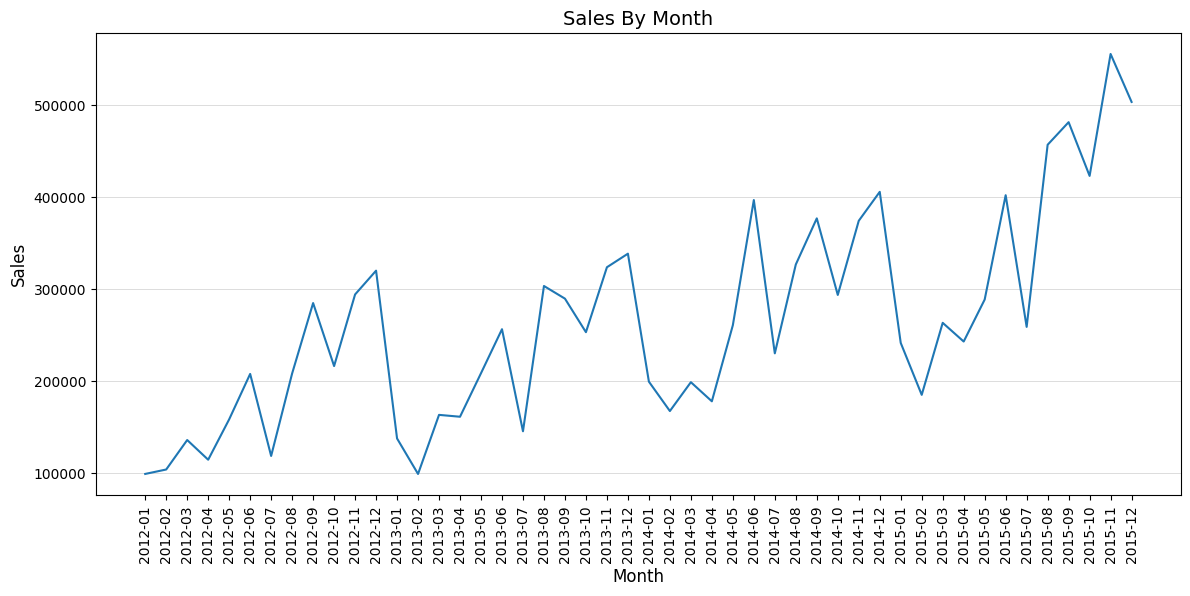

In [ ]:
# Plot the line chart
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='', linestyle='-')

# Format the plot
plt.title('Sales By Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=90) # Rotates labels for readability
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.6)

# Show plot
plt.show()

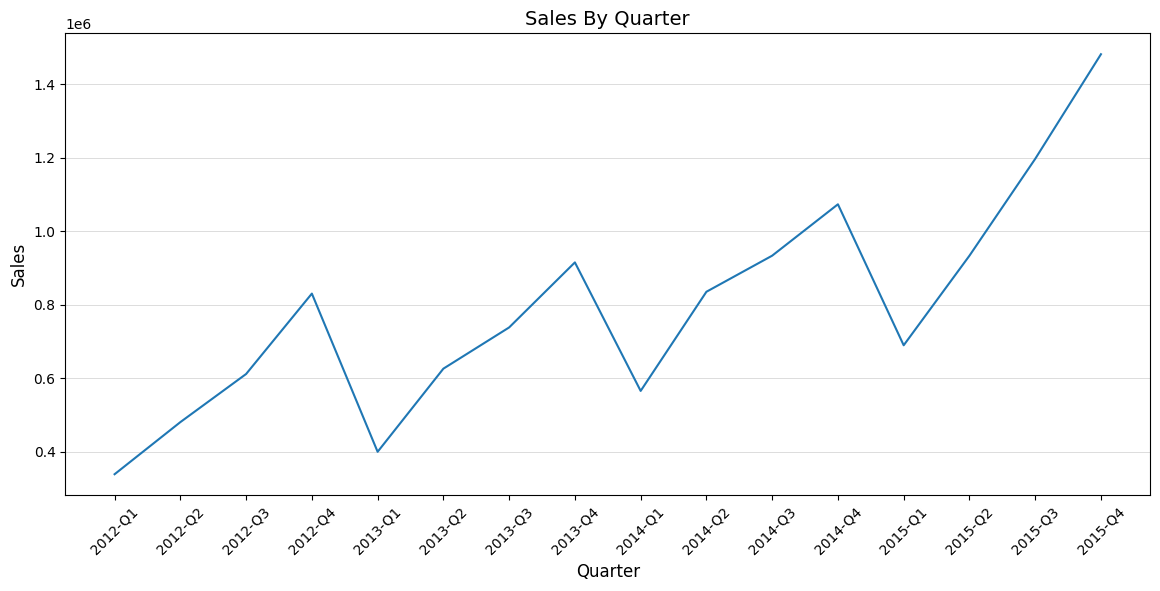

In [ ]:
# Plot the line chart
plt.figure(figsize=(14, 6))
plt.plot(quarterly_sales['Order Date'], quarterly_sales['Sales'], marker='', linestyle='-')

# Format the plot
plt.title('Sales By Quarter', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45) # Rotates labels for readability
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.6)

# Show plot
plt.show()

## Resample Examples

In [8]:
# Group Sales Data by Month
monthly_sales_rs = df.resample('ME',on='Order Date')['Sales'].sum().reset_index()
monthly_sales_rs['Order Date'] = monthly_sales_rs['Order Date'].astype(str)

# Group Sales Data by Quarter
quarterly_sales_rs = df.resample('QE', on='Order Date')['Sales'].sum().reset_index()
quarterly_sales_rs['Order Date'] = quarterly_sales_rs['Order Date'].astype(str).str.replace("Q", "-Q")

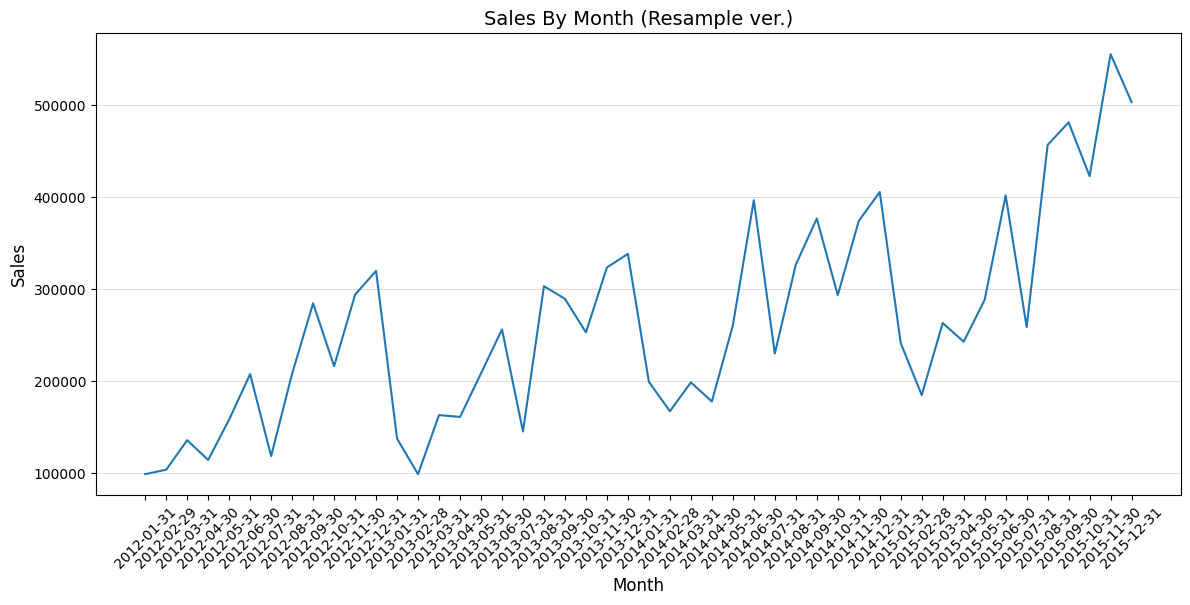

In [68]:
# Plot the line chart based on end of month using resample
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales_rs['Order Date'], monthly_sales_rs['Sales'], marker='', linestyle='-')

# Format the plot
plt.title('Sales By Month (Resample ver.)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45) # Rotates labels for readability
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.6)

# Show plot
plt.show()

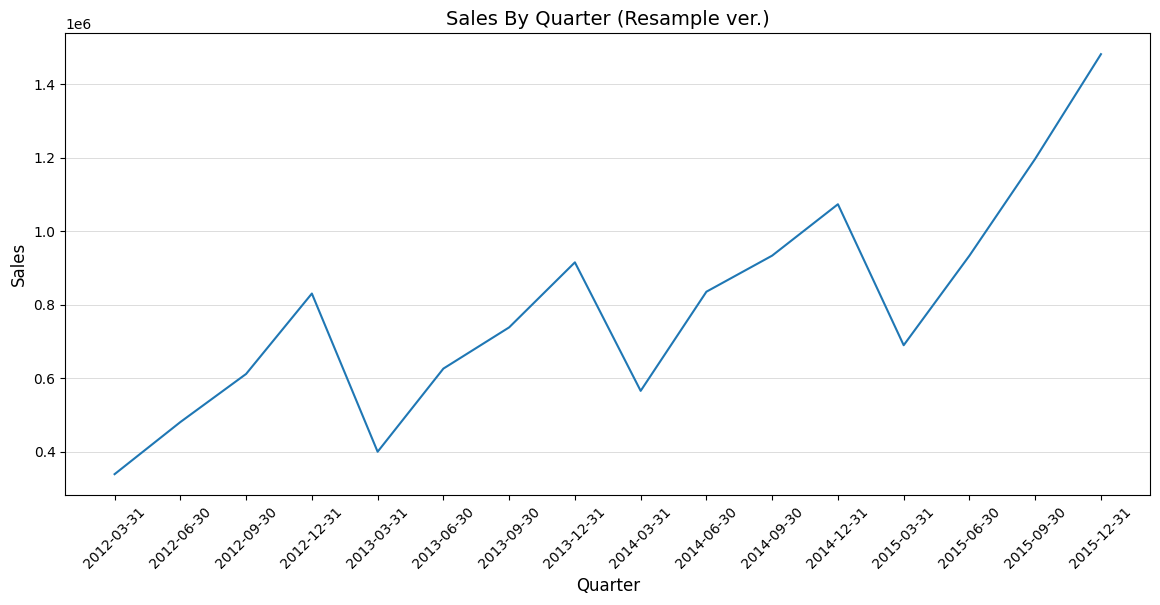

In [69]:
# Plot the line chart based on Quarter resample ver.
plt.figure(figsize=(14, 6))
plt.plot(quarterly_sales_rs['Order Date'], quarterly_sales_rs['Sales'], marker='', linestyle='-')

# Format the plot
plt.title('Sales By Quarter (Resample ver.)', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45) # Rotates labels for readability
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.6)

# Show plot
plt.show()

## Customizations and Innovations

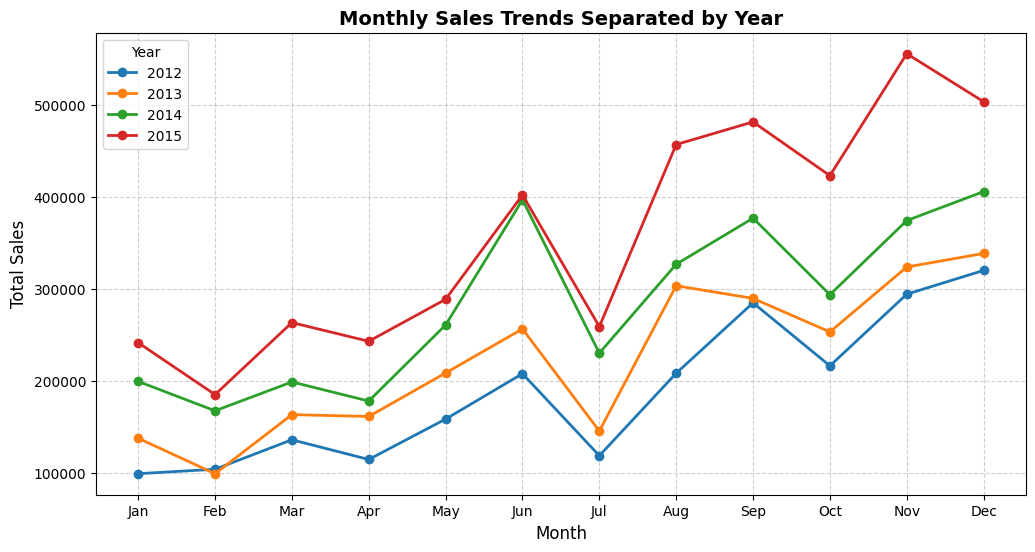

In [44]:
# Assign dataframe df to orders_df
orders_df = df

# Convert 'Order Date' to datetime format
orders_df["Order Date"] = pd.to_datetime(orders_df["Order Date"])
orders_df["Year"] = orders_df["Order Date"].dt.year
orders_df["Month"] = orders_df["Order Date"].dt.month

# Group by year and month to get monthly sales for each year
sales_by_year_month = orders_df.groupby(["Year", "Month"])['Sales'].sum().unstack(level=0)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot sales trends for each year
for year in sales_by_year_month.columns:
    ax.plot(sales_by_year_month.index, sales_by_year_month[year], marker="o", linestyle="-", linewidth=2, label=str(year))

# Labels and title
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Total Sales", fontsize=12)
ax.set_title("Monthly Sales Trends Separated by Year", fontsize=14, fontweight='bold')

# X-axis ticks (Month names)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Add grid and legend
ax.grid(True, linestyle="--", alpha=0.6)
ax.legend(title="Year")

# Show the plot
plt.show()


A subplot line chart showing monthly sales trends from 2012 to 2015 using ChatGPT.

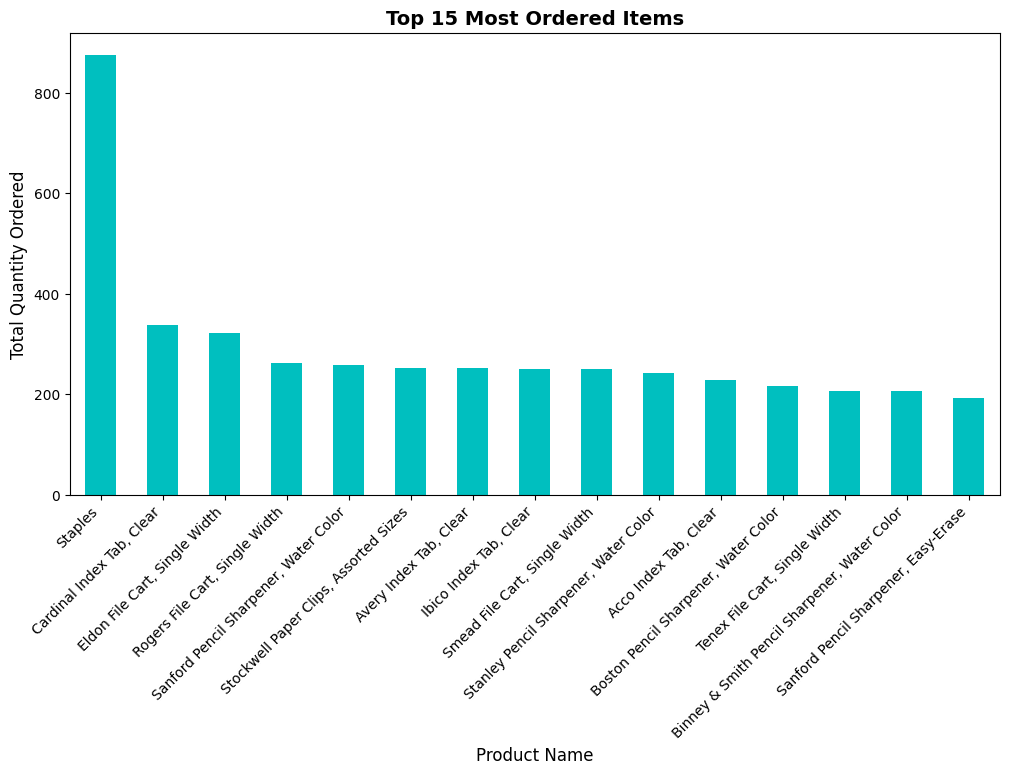

In [45]:
# Assign dataframe df to orders_df
orders_df = df

# Group by 'Product Name' to get total quantity ordered
product_order_counts = orders_df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False)

# Select top 15 most ordered items for better visualization
top_n = 15
top_products = product_order_counts.head(top_n)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bar chart
top_products.plot(kind="bar", color="c", ax=ax)

# Labels and title
ax.set_xlabel("Product Name", fontsize=12)
ax.set_ylabel("Total Quantity Ordered", fontsize=12)
ax.set_title(f"Top {top_n} Most Ordered Items", fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

Here, I created a bar chart listing the top 15 most ordered products. Created through ChatGPT.

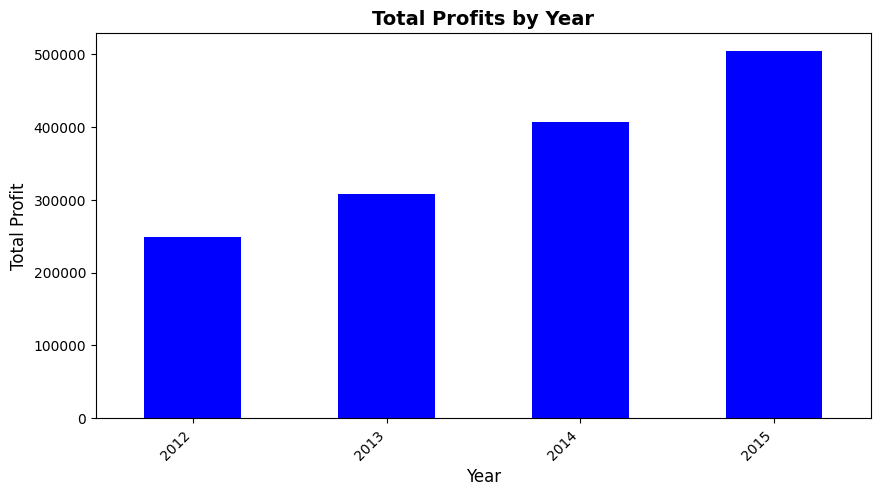

In [6]:
# Assign dataframe df to orders_df
orders_df = df

# Convert 'Order Date' to datetime format
orders_df["Order Date"] = pd.to_datetime(orders_df["Order Date"])
orders_df["Year"] = orders_df["Order Date"].dt.year

# Group by year and sum profits
profits_by_year = orders_df.groupby("Year")["Profit"].sum()

# Create subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Plot profit by year
profits_by_year.plot(kind="bar", color="b", ax=ax)

# Labels and title
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Total Profit", fontsize=12)
ax.set_title("Total Profits by Year", fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()



Here is a subplot bar chart looking at total profit growth of the superstore from 2012 to 2015.

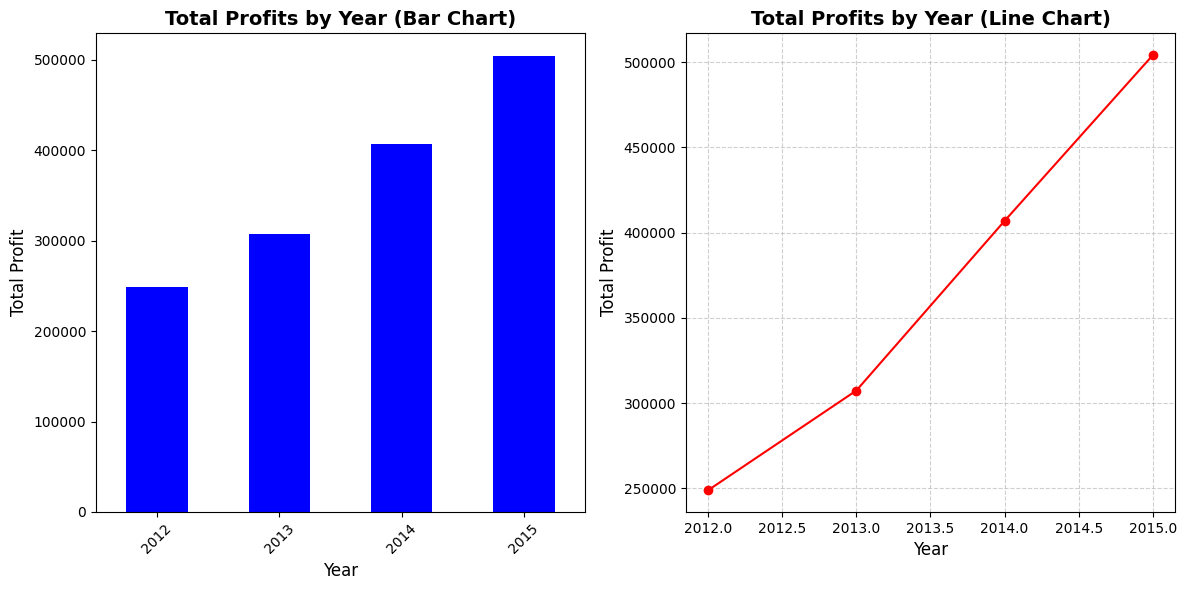

In [51]:
# Assign dataframe df to orders_df
orders_df = df

# Convert 'Order Date' to datetime format
orders_df["Order Date"] = pd.to_datetime(orders_df["Order Date"])
orders_df["Year"] = orders_df["Order Date"].dt.year

# Group by year and sum profits
profits_by_year = orders_df.groupby("Year")["Profit"].sum()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar chart
profits_by_year.plot(kind="bar", color="b", ax=axes[0])
axes[0].set_xlabel("Year", fontsize=12)
axes[0].set_ylabel("Total Profit", fontsize=12)
axes[0].set_title("Total Profits by Year (Bar Chart)", fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Line chart
profits_by_year.plot(kind="line", marker="o", color="r", linestyle="-", ax=axes[1])
axes[1].set_xlabel("Year", fontsize=12)
axes[1].set_ylabel("Total Profit", fontsize=12)
axes[1].set_title("Total Profits by Year (Line Chart)", fontsize=14, fontweight='bold')
axes[1].grid(True, linestyle="--", alpha=0.6)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Here is a combination of a bar chart with line chart for comparison purposes.

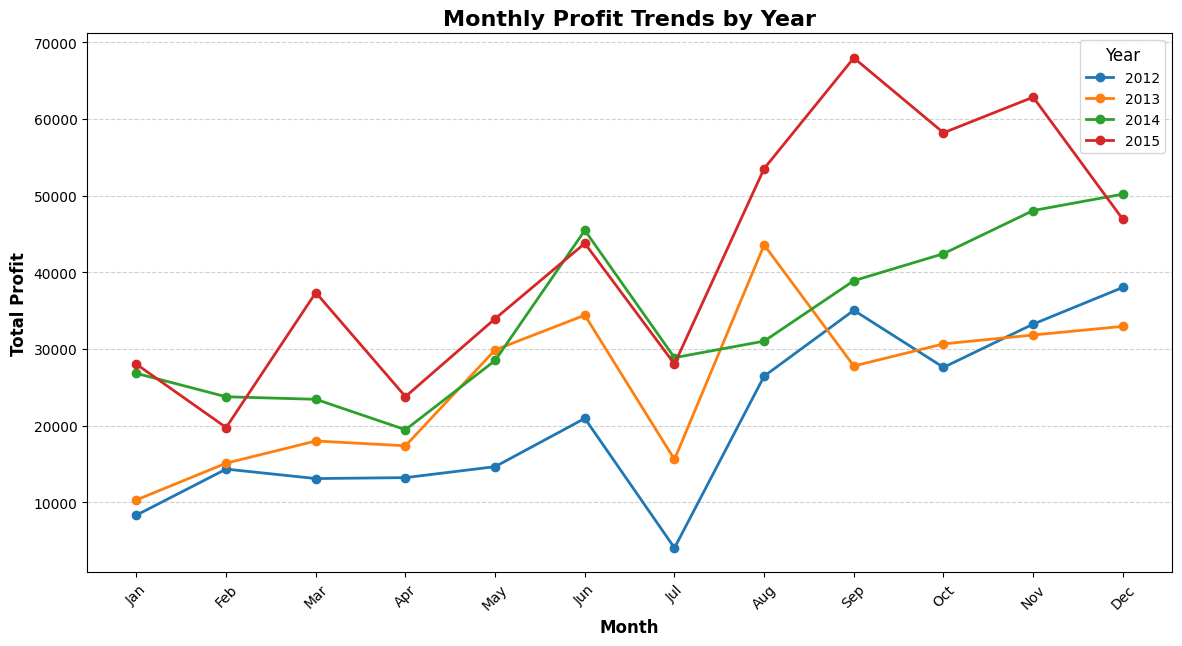

In [57]:
# Assign dataframe df to orders_df
orders_df = df

# Convert 'Order Date' to datetime format
orders_df["Order Date"] = pd.to_datetime(orders_df["Order Date"])
orders_df["Year"] = orders_df["Order Date"].dt.year
orders_df["Month"] = orders_df["Order Date"].dt.month

# Group by year and month to calculate total profit
monthly_profits = orders_df.groupby(["Year", "Month"])["Profit"].sum().unstack(level=0)

# Create subplots
fig, ax = plt.subplots(figsize=(14, 7))

# Plot multiple lines for each year to show trends
monthly_profits.plot(ax=ax, marker="o", linewidth=2)

# Improve readability
ax.set_xticks(range(1, 13))  # Ensure months are displayed correctly
ax.set_xticklabels([
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
], rotation=45)
ax.set_xlabel("Month", fontsize=12, fontweight='bold')
ax.set_ylabel("Total Profit", fontsize=12, fontweight='bold')
ax.set_title("Monthly Profit Trends by Year", fontsize=16, fontweight='bold')
ax.legend(title="Year", fontsize=10, title_fontsize=12)
ax.grid(True, linestyle="--", alpha=0.6, axis='y')  # Remove vertical grid lines

# Show the plot
plt.show()



A line chart showing profit trends from 2012 to 2015.

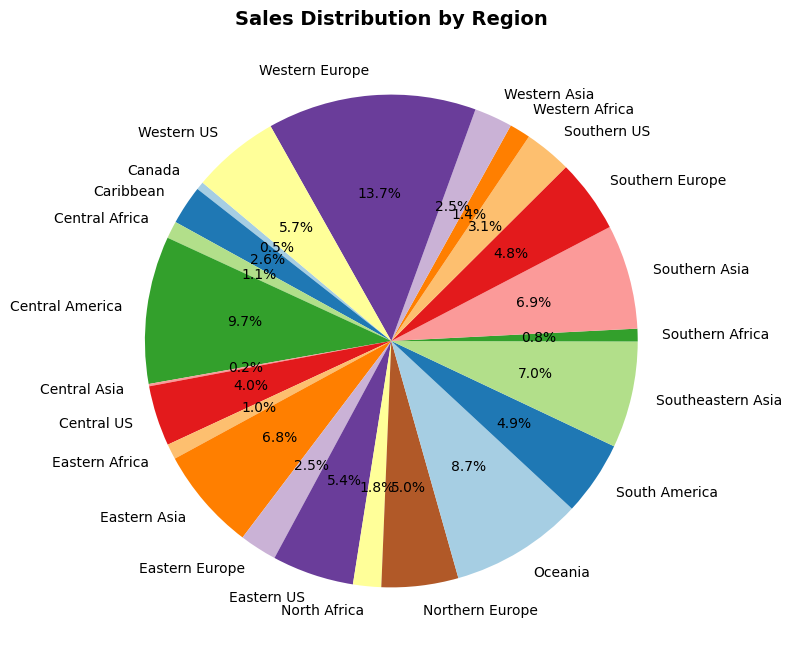

In [8]:
# Assign dataframe df to orders_df
orders_df = df

# Create pie chart for sales based on region
region_sales = orders_df.groupby("Region")["Sales"].sum()
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
ax.set_title("Sales Distribution by Region", fontsize=14, fontweight='bold')

# Show pie chart
plt.show()

A pie chart breaking down the sales distribution by region.

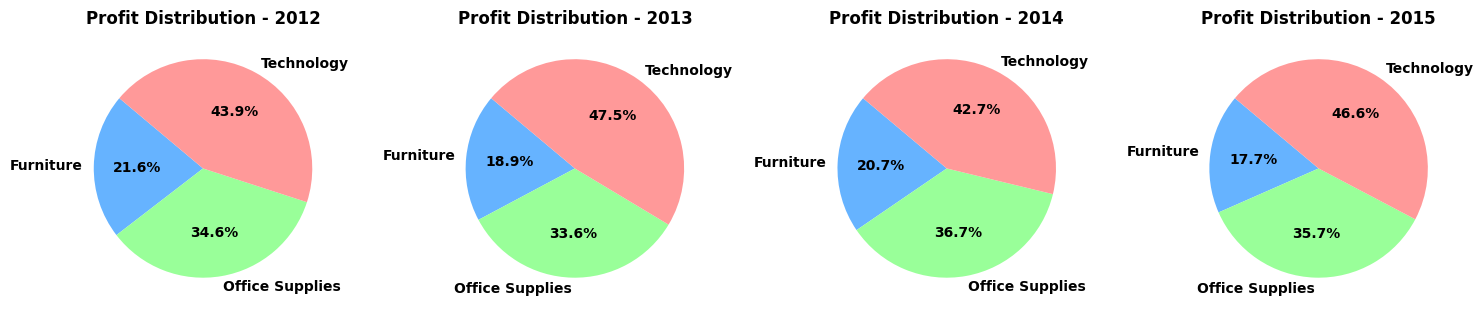

In [70]:
orders_df["Year"] = orders_df["Order Date"].dt.year

# Group profit by Category and Year
category_year_profit = orders_df.groupby(["Year", "Category"])["Profit"].sum().unstack()

# Create multiple pie charts for each year
fig, axes = plt.subplots(1, len(category_year_profit.index), figsize=(15, 6))

# Define colors for categories
colors = ["#66b3ff", "#99ff99", "#ff9999"]

for i, year in enumerate(category_year_profit.index):
    axes[i].pie(category_year_profit.loc[year], labels=category_year_profit.columns, autopct="%1.1f%%",
                colors=colors, startangle=140, textprops={'fontsize': 10, 'fontweight': 'bold'})
    axes[i].set_title(f"Profit Distribution - {year}", fontsize=12, fontweight="bold")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Multiple pie charts showing the profit distribution of product categories from 2012 to 2015.

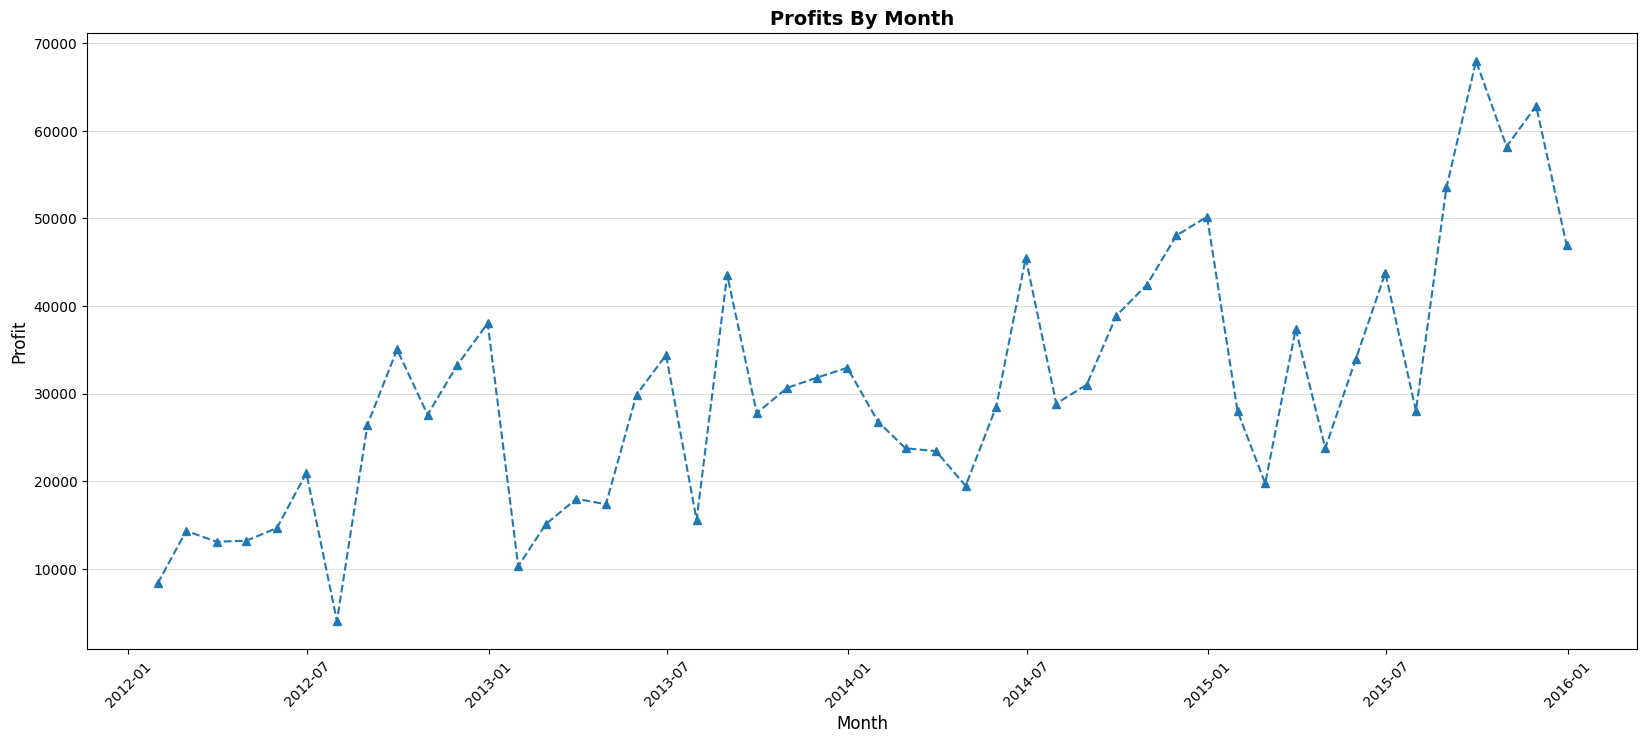

In [13]:
monthly_profits_rs = df.resample('ME',on='Order Date')['Profit'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(20, 8))
plt.plot(monthly_profits_rs['Order Date'], monthly_profits_rs['Profit'], marker='^', linestyle='--')

# Format the plot
plt.title('Profits By Month', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=45) # Rotates labels for readability
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.6)

# Show plot
plt.show()

A line chart showing profit gained by month.

In [14]:
# Profits by Quarter Resample
quarterly_profits_rs = df.resample('QE',on='Order Date')['Profit'].sum().reset_index()
quarterly_profits_rs['Order Date'] = quarterly_profits_rs['Order Date'].astype(str)

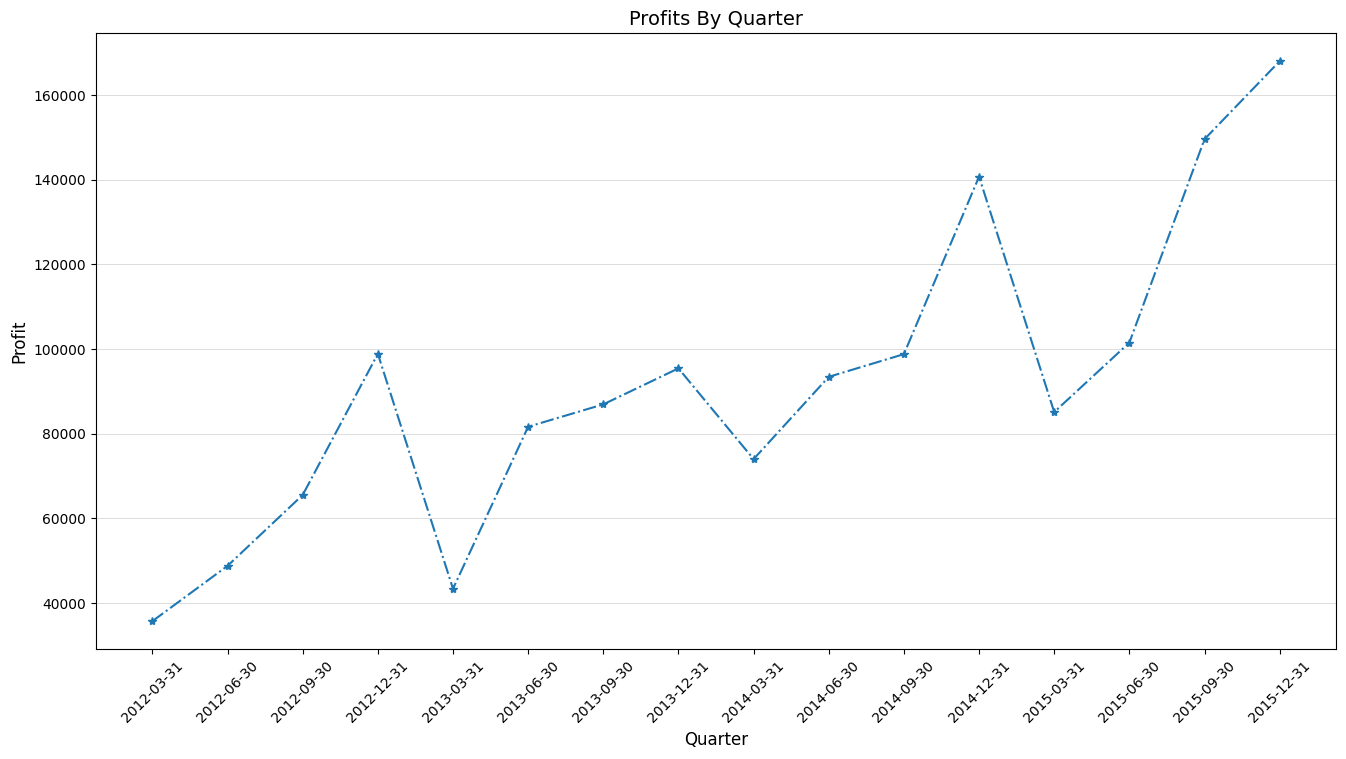

In [16]:
# Plot the line chart
plt.figure(figsize=(16, 8))
# Change the marker to an asterisk and linestyle to dotline
plt.plot(quarterly_profits_rs['Order Date'], quarterly_profits_rs['Profit'], marker='*', linestyle='-.')

# Format the plot
plt.title('Profits By Quarter', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=45) # Rotates labels for readability
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.6)

# Show plot
plt.show()

A chart showing profits gained by quarter from 2012 to 2015.

In [11]:
year = df[df['Order Date'].dt.year == 2013]
rs2013 = year.resample('ME',on='Order Date')['Sales'].sum().reset_index()
rs2013['Order Date'] = rs2013['Order Date'].astype(str)

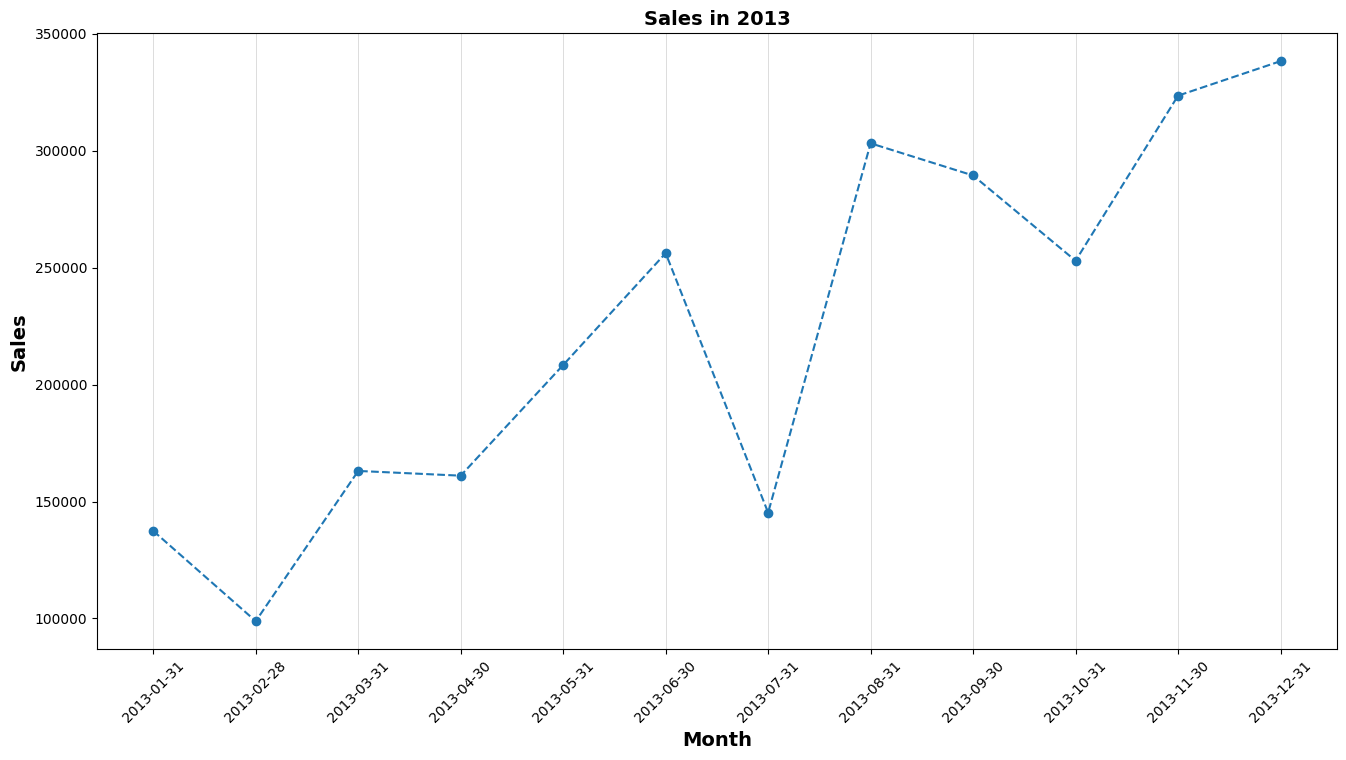

In [12]:
# Plot the line chart
plt.figure(figsize=(16, 8))
plt.plot(rs2013['Order Date'], rs2013['Sales'], marker='o', linestyle='--')

# Format the plot
plt.title('Sales in 2013', fontsize=14, fontweight="bold" )
plt.xlabel('Month', fontsize=14, fontweight="bold")
plt.ylabel('Sales', fontsize=14, fontweight="bold")
plt.xticks(rotation=45) # Rotates labels for readability
plt.grid(axis='x', linestyle='-', linewidth=0.5, alpha=0.6)

# Show plot
plt.show()

A line chart of profits for the year of 2013.  

# Superstore Visualization PART 2


Zachary Lewis

# Missing Values - VER. 2

The Superstore operates internationally but only logs postal codes for customers in the US hence the large number of null fields. Furthermore, the column's data type is float resulting in postal codes with decimal points.

In the last assignment, I thought changing the `Postal Code` column from `float` to `int` was correct. I was mistaken and had missed that some states, e.g. Massachusettes, Connecticut, and New Jersey, saw postal codes beginning with zero altered due to Pandas automatically assigning the column's data type to `float`.

I addressed this with guidance from the videos embedded on the assignment page.

## Workspace - Missing Values

In [ ]:
# Check for improper values.
df[df['State'].str.contains('Mass')]

Row ID                  Order ID Order Date  Ship Date       Ship Mode  \
1363    39250  CA-2012-KH16330140-40999 2012-03-31 2012-04-05  Standard Class   
1364    39251  CA-2012-KH16330140-40999 2012-03-31 2012-04-05  Standard Class   
2050    37862  CA-2012-CT11995140-41035 2012-05-06 2012-05-11  Standard Class   
2051    37860  CA-2012-CT11995140-41035 2012-05-06 2012-05-11  Standard Class   
2052    37859  CA-2012-CT11995140-41035 2012-05-06 2012-05-11  Standard Class   
2053    37861  CA-2012-CT11995140-41035 2012-05-06 2012-05-11  Standard Class   
2153    34043  CA-2012-KT16480140-41040 2012-05-11 2012-05-16  Standard Class   
2294    37173  CA-2012-FG14260140-41049 2012-05-20 2012-05-25  Standard Class   
2295    37175  CA-2012-FG14260140-41049 2012-05-20 2012-05-25  Standard Class   
2296    37174  CA-2012-FG14260140-41049 2012-05-20 2012-05-25  Standard Class   
2365    49164    MO-2012-Co264086-41053 2012-05-24 2012-05-29    Second Class   
2376    49165    MO-2012-Co264086-41053 2012-05-24 2012-05-29    Second Class   
2878    44583    MO-2012-LR703586-41072 2012-06-12 2012-06-18  Standard Class   
2882    44582    MO-2012-LR703586-41072 2012-06-12 2012-06-18  Standard Class   
3202    42872    MO-2012-DE325586-41082 2012-06-22 2012-06-25    Second Class   
5074    33968  CA-2012-RR19525140-41160 2012-09-08 2012-09-11    Second Class   
5075    33970  CA-2012-RR19525140-41160 2012-09-08 2012-09-11    Second Class   
5076    33967  CA-2012-RR19525140-41160 2012-09-08 2012-09-11    Second Class   
5077    33969  CA-2012-RR19525140-41160 2012-09-08 2012-09-11    Second Class   
5725    32621  CA-2012-GZ14545140-41179 2012-09-27 2012-10-02  Standard Class   
6201    40932  CA-2012-TC21295140-41195 2012-10-13 2012-10-16     First Class   
6202    40930  CA-2012-TC21295140-41195 2012-10-13 2012-10-16     First Class   
6203    40931  CA-2012-TC21295140-41195 2012-10-13 2012-10-16     First Class   
7736    39300  CA-2012-AA10645140-41243 2012-11-30 2012-12-02     First Class   
7737    39301  CA-2012-AA10645140-41243 2012-11-30 2012-12-02     First Class   
7738    39302  CA-2012-AA10645140-41243 2012-11-30 2012-12-02     First Class   
8822    37592  CA-2012-AJ10780140-41270 2012-12-27 2012-12-31  Standard Class   
8823    37593  CA-2012-AJ10780140-41270 2012-12-27 2012-12-31  Standard Class   
8824    37594  CA-2012-AJ10780140-41270 2012-12-27 2012-12-31  Standard Class   
8980    33639  US-2012-GM14455140-41273 2012-12-30 2013-01-02     First Class   
8981    33638  US-2012-GM14455140-41273 2012-12-30 2013-01-02     First Class   
9307    36623  CA-2013-SC20260140-41290 2013-01-16 2013-01-21  Standard Class   
9922    37066  CA-2013-SS20875140-41329 2013-02-24 2013-03-01  Standard Class   
9923    37065  CA-2013-SS20875140-41329 2013-02-24 2013-03-01  Standard Class   
10611   49326    MO-2013-BW111086-41364 2013-03-31 2013-03-31        Same Day   
11265   39645  US-2013-JW15220140-41394 2013-04-30 2013-05-04  Standard Class   
11266   39643  US-2013-JW15220140-41394 2013-04-30 2013-05-04  Standard Class   
11267   39646  US-2013-JW15220140-41394 2013-04-30 2013-05-04  Standard Class   
11268   39644  US-2013-JW15220140-41394 2013-04-30 2013-05-04  Standard Class   
11269   39647  US-2013-JW15220140-41394 2013-04-30 2013-05-04  Standard Class   
13405   33712  CA-2013-PP18955140-41461 2013-07-06 2013-07-11  Standard Class   
13435   33079  CA-2013-CB12535140-41464 2013-07-09 2013-07-13  Standard Class   
13436   33078  CA-2013-CB12535140-41464 2013-07-09 2013-07-13  Standard Class   
14177   37959  CA-2013-DB13405140-41494 2013-08-08 2013-08-10    Second Class   
14178   37958  CA-2013-DB13405140-41494 2013-08-08 2013-08-10    Second Class   
14179   37957  CA-2013-DB13405140-41494 2013-08-08 2013-08-10    Second Class   
14519   32754  CA-2013-SC20440140-41503 2013-08-17 2013-08-21  Standard Class   
15007   34115  CA-2013-DR12940140-41518 2013-09-01 2013-09-08  Standard Class   
15008   34114  CA-2013-DR12940140-4151

In [ ]:
# Check for duplicate data
df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       False
67       False
68       False
69       False
70       False
71       False
72       False
73       False
74       False
75       False
76       False
77       False
78       False
79       False
80       False
81       False
82       False
83       False
84       False
85       False
86       False
87       False
88       False
89       False
90       False
91       False
92       False
93       False
94       False
95       False
96       False
97       False
98       False
99       False
100      False
101      False
102      False
103      False
104      False
105      False
106      False
107      False
108      False
109      False
110      False
111      False
112      False
113      False
114      False
115      False
116      False
117      False
118      False
119      False
120      False
121      False
122      False
123      False
124      False
125      False
126      False
127      False
128      False
129      False
130      False
131      False
132      False
133      False
134      False
135      False
136      False
137      False
138      False
139      False
140      False
141      False
142      False
143      False
144      False
145      False
146      False
147      False
148      False
149      False
150      False
151      False
152      False
153      False
154      False
155      False
156      False
157      False
158      False
159      False
160      False
161      False
162      False
163      False
164      False
165      False
166      False
167      False
168      False
169      False
170      False
171      False
172      False
173      False
174      False
175      False
176      False
177      False
178      False
179      False
180      False
181      False
182      False
183      False
184      False
185      False
186      False
187      False
188      False
189      False
190      False
191      False
192      False
193      False
194      False
195      False
196      False
197      False
198      False
199      False
200      False
201      False
202      False
203      False
204      False
205      False
206      False
207      False
208      False
209      False
210      False
211      False
212      False
213      False
214      False
215      False
216      False
217      False
218      False
219      False
220      False
221      False
222      False
223      False
224      False
225      False
226      False
227      False
228      False
229      False
230      False
231      False
232      False
233      False
234      False
235      False
236      False
237      False
238      False
239      False
240      False
241      False
242      False
243      False
244      False
245      False
246      False
247      False
248      False
249      False
250      False
251      False
252      False
253      False
254      False
255      False
256      False
257      False
258      False
259      False
260      False
261      False
262      False
263      False
264      False
265      False
266      F

In [ ]:
# Total count of rows and columns
# df.shape

In [ ]:
# Information of column datatypes with number of nonnull values per column
# df.info()

In [ ]:
# Sum of null values in the dataframe
# df.isna().sum()

In [ ]:
# columns = ['Country', 'City', 'State', 'Postal Code']
# mask = df['Postal Code'].isnull()

# # df[columns].loc[mask].sort_index().head(20)

In [ ]:
# columns = ['Country', 'City', 'State', 'Postal Code']
# mask = df['Postal Code'].notnull()

# df[columns].loc[mask].sort_values('Postal Code').head(20)

In [ ]:
# df[columns].loc[mask].value_counts()

In [ ]:
# df1[columns].loc[mask].value_counts().to_frame().sort_values('Postal Code').head(20)
# df[columns].loc[mask].value_counts().to_frame().sort_values('Postal Code').tail(20)

In [ ]:
# df1 = pd.read_excel('/content/drive/MyDrive/Newman/Descriptive Analytics/Superstore EDA/data/Global_Superstore_Orders_2012_2015.xlsx', sheet_name = 0, dtype = {'Postal Code': 'object'})

In [ ]:
# df1.sample(20)

# Reformat `Postal Code`

* Set as text data type: **object, string**
* Ensure leading zeros are kept: for instance **01040**
* Ensure nulls are recognizable as not applicable (for non-US addresses): **na**

In [ ]:
# path = '/content/drive/MyDrive/Newman/Descriptive Analytics/Superstore EDA/data/Global_Superstore_Orders_2012_2015.xlsx'

In [ ]:
# df1 = pd.read_excel(path, dtype={'Postal Code': object})

In [ ]:
# df1.sample(20)

In [ ]:
# df1['Postal Code'] = df1['Postal Code'].astype(str)
# df1['Postal Code'].sort_values()

In [ ]:
# df1.info()

In [ ]:
# df1['Postal Code'] = df1['Postal Code'].astype('str').str.zfill(5)
# column = ['Country', 'State', 'City', 'Postal Code']
# mask = df1['State'].str.contains('Conn') | df1['State'].str.contains('Mass')
# df1[columns].loc[mask].sort_values('Postal Code').head(20)

In [ ]:
# df1['Postal Code'].unique()

In [ ]:
# df1['Postal Code'] = df1['Postal Code'].replace('00nan', 'na')

In [ ]:
# df1['Postal Code'].sort_values().unique()

In [ ]:
# df1['Postal Code'].sample(10)

#Superstore Visualization

In [ ]:
df.Sales.describe()

count   51,290.00
mean       246.49
std        487.57
min          0.44
25%         30.76
50%         85.06
75%        251.06
max     22,638.48
Name: Sales, dtype: float64

In [ ]:
Sales_Fig = ['Customer Name', 'State', 'Product Name', 'Sales']
df[Sales_Fig].sort_values(by='Sales', ascending = False).head(10)

Customer Name         State  \
1112          Sean Miller       Florida   
29567        Tamara Chand       Indiana   
36255        Raymond Buch    Washington   
46565        Tom Ashbrook      New York   
48165        Hunter Lopez      Delaware   
33013       Adrian Barton      Michigan   
5565         Sanjit Chand     Minnesota   
22487        Bill Shonely    New Jersey   
20703        Sanjit Engle      Virginia   
23586  Christopher Conant  Pennsylvania   

                                            Product Name     Sales  
1112   Cisco TelePresence System EX90 Videoconferenci... 22,638.48  
29567              Canon imageCLASS 2200 Advanced Copier 17,499.95  
36255              Canon imageCLASS 2200 Advanced Copier 13,999.96  
46565              Canon imageCLASS 2200 Advanced Copier 11,199.97  
48165              Canon imageCLASS 2200 Advanced Copier 10,499.97  
33013   GBC Ibimaster 500 Manual ProClick Binding System  9,892.74  
5565                Ibico EPK-21 Electric Binding System  9,449.95  
22487   3D Systems Cube Printer, 2nd Generation, Magenta  9,099.93  
20703  HP Designjet T520 Inkjet Large Format Printer ...  8,749.95  
23586              Canon imageCLASS 2200 Advanced Copier  8,399.98

## Histographs:

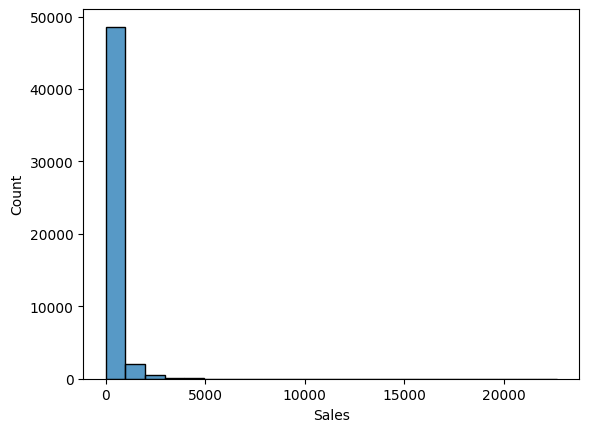

In [ ]:
# Return histogram of Sales
sns.histplot(df.Sales, binwidth=1000);

Sales is heavily skewed right with a few outliers

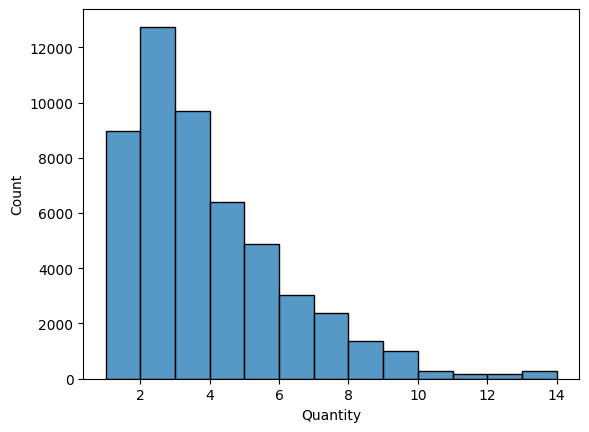

In [ ]:
# Returns histograph of Quantity
sns.histplot(df.Quantity, binwidth = 1);

The histograph for quantity is positively skewed with '2' having the largest representation and '13' the smallest.

In [ ]:
# Returns the value counts for Quantity
df.Quantity.value_counts()

Quantity
2     12748
3      9682
1      8963
4      6385
5      4882
6      3020
7      2385
8      1361
9       987
10      276
14      186
12      176
11      156
13       83
Name: count, dtype: int64

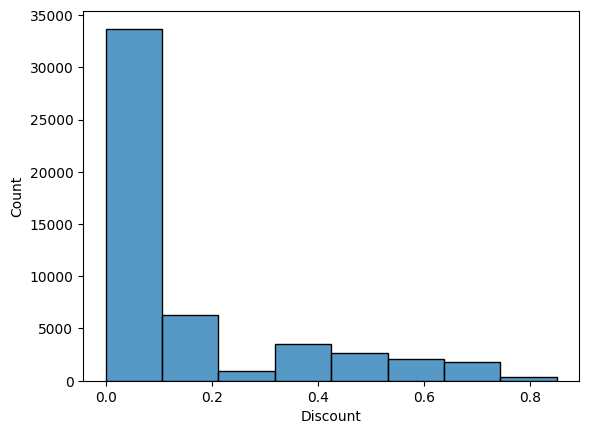

In [ ]:
# Returns histograph of Discount
sns.histplot(df.Discount, binwidth = 0.1);

Discount histograph is skewed right with majority of values between '0.0' and '0.1'.  

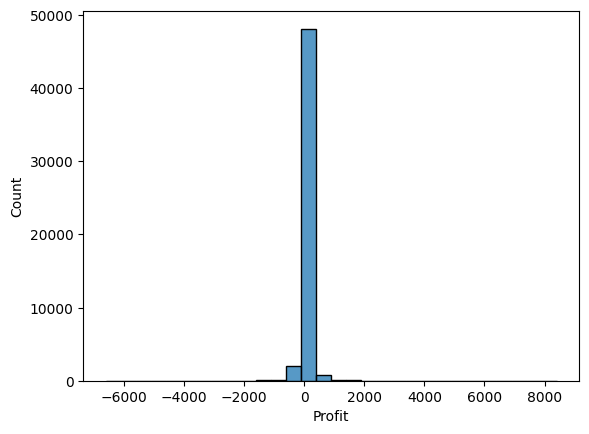

In [ ]:
# Returns histograph of Profit
sns.histplot(df.Profit, binwidth = 500);

Histograph shows outliers of profit losses and profit gains.

## Box Plots:

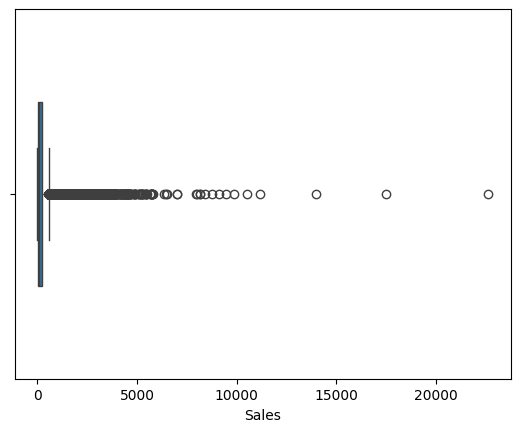

In [ ]:
# Returns box plot for Sales
sns.boxplot(x=df.Sales, width = .5);

Boxplot for Sales potentially shows a large number of outliers from 1000 and up. Particularly the three points starting from 13,000

In [ ]:
Sales_Fig = ['Customer Name', 'State', 'Product Name', 'Sales']
df[Sales_Fig].sort_values(by='Sales', ascending = False).head(10)

Customer Name         State  \
1112          Sean Miller       Florida   
29567        Tamara Chand       Indiana   
36255        Raymond Buch    Washington   
46565        Tom Ashbrook      New York   
48165        Hunter Lopez      Delaware   
33013       Adrian Barton      Michigan   
5565         Sanjit Chand     Minnesota   
22487        Bill Shonely    New Jersey   
20703        Sanjit Engle      Virginia   
23586  Christopher Conant  Pennsylvania   

                                            Product Name     Sales  
1112   Cisco TelePresence System EX90 Videoconferenci... 22,638.48  
29567              Canon imageCLASS 2200 Advanced Copier 17,499.95  
36255              Canon imageCLASS 2200 Advanced Copier 13,999.96  
46565              Canon imageCLASS 2200 Advanced Copier 11,199.97  
48165              Canon imageCLASS 2200 Advanced Copier 10,499.97  
33013   GBC Ibimaster 500 Manual ProClick Binding System  9,892.74  
5565                Ibico EPK-21 Electric Binding System  9,449.95  
22487   3D Systems Cube Printer, 2nd Generation, Magenta  9,099.93  
20703  HP Designjet T520 Inkjet Large Format Printer ...  8,749.95  
23586              Canon imageCLASS 2200 Advanced Copier  8,399.98

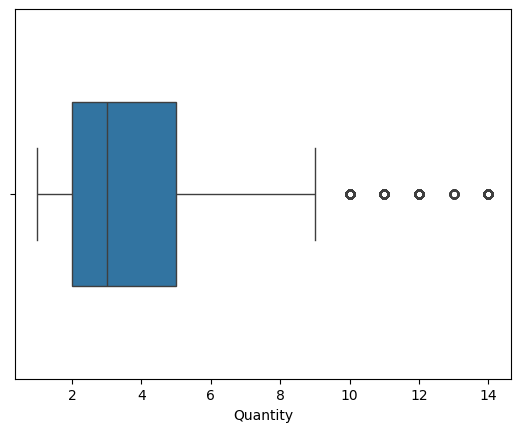

In [ ]:
# Returns box plot for Quantity
sns.boxplot(x=df.Quantity, width = .5);

Box plot for Quantity shows the 3 as the mean with potentially five outliers between 10 and 14.

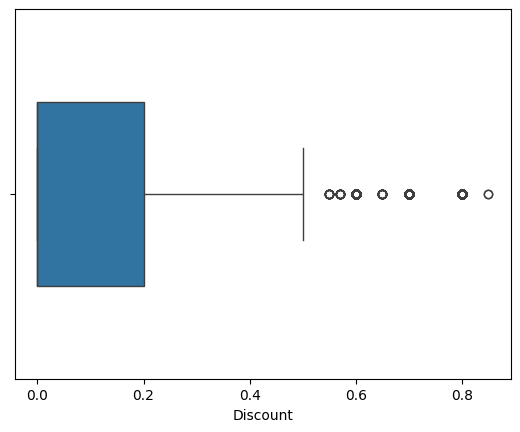

In [ ]:
# Returns box plot for Discount
sns.boxplot(x=df.Discount, width = .5);

Box plot for Discount shows majority of the store's discounts range from zero to 20% with seven outliers between 50% to 80%.

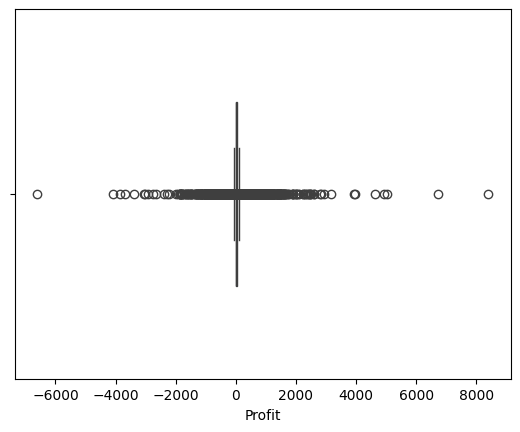

In [ ]:
# Returns box plot for Profit
sns.boxplot(x=df.Profit, width = .5);

Box plot for profit shows a vast range of outliers with the largest profit loss 6,599 and the largest profit gain 8,399.98

In [ ]:
profit_fig = ['Customer Name', 'City', 'State', 'Region', 'Product Name', 'Profit']
df[profit_fig].sort_values(by='Profit', ascending = False).head(50)

Customer Name                City  \
29567          Tamara Chand           Lafayette   
36255          Raymond Buch             Seattle   
48165          Hunter Lopez              Newark   
33013         Adrian Barton             Detroit   
5565           Sanjit Chand         Minneapolis   
43831         Patrick Jones               Prato   
46565          Tom Ashbrook       New York City   
10273  Christopher Martinez             Atlanta   
548             Carol Adams                Fuji   
24420       Cynthia Arntzen                Kota   
20703          Sanjit Engle           Arlington   
46720          Dave Poirier              Meknes   
29627         Daniel Raglin          Providence   
34207           Andy Reiter             Jackson   
4983      Elpida Rittenbach                Lugo   
12044       Mike Gockenbach               Luton   
32904            Ann Steele           Whakatane   
21303         Karen Daniels             Yonkers   
22487          Bill Shonely            Lakewood   
40150       Maria Bertelson              Sydney   
19607           Harry Marie         Springfield   
8251       Tom Boeckenhauer       New York City   
17556         Keith Dawkins       New York City   
45058           Vivek Grady  Thiruvananthapuram   
20408          James Galang    Stockton-on-Tees   
6817           Nathan Mautz       New York City   
25608          Susan Pistek             Bologna   
13920         Ellis Ballard       West Bromwich   
11242       Shirley Daniels             Midland   
46040             Jane Waco          Sacramento   
21212        Laurel Beltran           Edinburgh   
645           Odella Nelson               Muret   
4177              Becky Pak              London   
46919          Meg O'Connel           Hamamatsu   
34075     Patrick O'Donnell    Stockton-on-Tees   
39901         Steven Roelle       New York City   
30193         Dennis Pardue     North Las Vegas   
2672          Daniel Raglin          Townsville   
3335        George Zrebassa     Blagoveshchensk   
7017            Dean percer              Suzhou   
20495            Cari Sayre              Khulna   
36936             Jane Waco               Dakar   
16600       Mike Gockenbach          Lubumbashi   
33014          Frank Hawley                Palu   
1015            Carlos Daly            Shanghai   
8693      Katherine Nockton           Blackpool   
21989         Barry Weirich             Kananga   
6836      Patrick O'Donnell                Nice   
30561     Russell D'Ascenzo             Mashhad   
10327          Fred Hopkins             Seattle   

                                    State             Region  \
29567                             Indiana         Central US   
36255                          Washington         Western US   
48165                            Delaware         Eastern US   
33013                            Michigan         Central US   
5565                            Minnesota         Central US   
43831                             Tuscany    Southern Europe   
46565                            New York         Eastern US   
10273                             Georgia        Southern US   
548                              Shizuoka       Eastern Asia   
24420                        Chhattisgarh      Southern Asia   
20703                            Virginia        Southern US   
46720                    Meknès-Tafilalet       North Africa   
29627                        Rhode Island         Eastern US   
34207                            Michigan         Central US   
4983                              Galicia    Southern Europe   
12044                             England    Northern Europe   
32904                       Bay of Plenty            Oceania   
21303                            New York         Eastern US   
22487                          New Jersey         Eastern US   
40150                     New South Wales            Oceania   
19607                            Missouri         Central US   
8251

In [ ]:
profit_fig = ['Customer Name', 'City', 'State', 'Region', 'Product Name', 'Profit']
df[profit_fig].sort_values(by='Profit', ascending = True).head(50)

Customer Name                        City  \
31904       Cindy Stewart                   Lancaster   
29213       Denise Monton                     Bornova   
47231      Grant Thornton                  Burlington   
3793          Luke Foster                 San Antonio   
37163      Sharelle Roach                  Louisville   
24285    Saphhira Shifley                      Lisbon   
28510        Skye Norling                      Lahore   
49661       Henry Goldwyn                     Chicago   
34513     Julie Creighton                     Vilnius   
19275    Natalie Fritzler                      Newark   
38482         Nat Carroll                      Lahore   
48418         Nathan Cano                     Houston   
21568     Valerie Mitchum              Bergen op Zoom   
34795    Corinna Mitchell                   Stockholm   
12080     Benjamin Farhat                     Hanover   
2677        Michelle Tran                   Gaziantep   
41588      Nancy Lomonaco                   Stockholm   
9496          Joseph Holt                     Concord   
22291    Zuschuss Carroll                     Houston   
3894         Jamie Frazer                      Beykoz   
1112          Sean Miller                Jacksonville   
13325         Carl Ludwig                         Açu   
6721        Greg Matthias                   Amsterdam   
10697          Don Miller                     Hanover   
50889          Jack Garza                      Ankara   
34237    Michael Granlund                      Lahore   
50132      Kelly Andreada                       Reims   
10237        Harry Greene                     Tilburg   
15682     Tracy Blumstein                Philadelphia   
33169    Stefania Perrino                   Barcelona   
49629         Carol Adams              Belo Horizonte   
19580   Russell D'Ascenzo                       Zaria   
27130       Michelle Tran                     Makurdi   
31052         Clay Ludtke                   Stockholm   
7046        Karen Daniels                     Houston   
7143         Raymond Buch                      Cairns   
25609    Zuschuss Carroll                        Rome   
342              Jay Fein                     Bornova   
50437       Juliana Krohn                       Lagos   
43933  Benjamin Patterson              San Pedro Sula   
4975         Becky Martin                 San Antonio   
19713  Lauren Leatherbury                    Toulouse   
11847        Sarah Foster                       Izmir   
45682       Ralph Kennedy  Santiago de los Caballeros   
46342       Tracy Hopkins                  Burlington   
41055       Michael Moore                     Le Mans   
19710       Tracy Hopkins                     Bangkok   
30135        Ralph Arnett                       Adana   
7705         Anthony Witt                   Amsterdam   
12860     Candace McMahon                     Hanover   

                                    State             Region  \
31904                                Ohio         Eastern US   
29213                               Izmir       Western Asia   
47231                      North Carolina        Southern US   
3793                                Texas         Central US   
37163                            Colorado         Western US   
24285                              Lisboa    Southern Europe   
28510                              Punjab      Southern Asia   
49661                            Illinois         Central US   
34513                             Vilnius    Northern Europe   
19275                                Ohio         Eastern US   
38482                              Punjab      Southern Asia   
48418                               Texas         Central US   
21568                       North Brabant     Western Europe   
34795                           Stockholm    Northern Europe   
12080                        Lower Saxony     Western Europe   
2677                            Gaziantep       Western Asia   
41588           

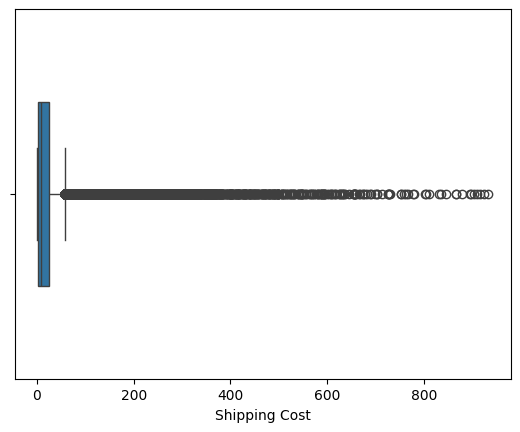

In [ ]:
# Returns box plot for Shipping Cost
sns.boxplot(x=df['Shipping Cost'], width = .5);

Shipping Cost appears to be relatively low on average. However, there is a large number of records that range from 50 to over 900.

In [ ]:
shipping_fig = ['Customer Name', 'City', 'State', 'Region', 'Product Name', 'Shipping Cost']
df[shipping_fig].sort_values(by='Shipping Cost', ascending = False).head(50)

Customer Name                City                State  \
13912         Rick Hansen       New York City             New York   
20727       Justin Ritter          Wollongong      New South Wales   
30040        Craig Reiter            Brisbane           Queensland   
20543    Katherine Murray              Berlin               Berlin   
30718         Rick Hansen               Dakar                Dakar   
25300         Jim Mitchum              Sydney      New South Wales   
6864        Toby Swindell             Porirua           Wellington   
10905          Mick Brown            Hamilton              Waikato   
46040           Jane Waco          Sacramento           California   
9496          Joseph Holt             Concord       North Carolina   
1445         Greg Maxwell          Alexandria             Virginia   
11027      Anthony Jacobs               Kabul                Kabul   
8754      Magdelene Morse               Jizan                Jizan   
17761      Vicky Freymann              Toledo               Parana   
24114        Peter Fuller          Mudanjiang         Heilongjiang   
41632        Ben Peterman               Paris        Ile-de-France   
47087       Thomas Boland           Henderson             Kentucky   
43831       Patrick Jones               Prato              Tuscany   
34632            Jim Sink          Townsville           Queensland   
49502     Ritsa Hightower              Uvinza               Kigoma   
14165           Ann Blume               Bytom              Silesia   
6554         Sue Ann Reed             Chicago             Illinois   
1914    Jason Klamczynski              Suzhou                Anhui   
21212      Laurel Beltran           Edinburgh             Scotland   
41633        Naresj Patel              Juárez            Chihuahua   
43679   Valerie Dominguez           Soyapango         San Salvador   
8352       Phillip Breyer              Taipei          Taipei City   
1024       Eugene Barchas             Leipzig               Saxony   
21525      Karen Ferguson         Los Angeles           California   
9911   Benjamin Patterson               Surat              Gujarat   
8816            Rick Reed       Santo Domingo        Santo Domingo   
13612        Bill Shonely        Saint-Brieuc             Brittany   
16682          Joel Eaton            Amarillo                Texas   
6720         Dave Poirier          Gold Coast           Queensland   
8143           Nora Preis              Fresno           California   
5202        Aaron Hawkins              Kamina              Katanga   
5221        Darrin Martin       New York City             New York   
47231      Grant Thornton          Burlington       North Carolina   
34075   Patrick O'Donnell    Stockton-on-Tees              England   
100            Dan Lawera            Brisbane           Queensland   
27292           Joy Bell-             Mataram  Nusa Tenggara Barat   
47589         Barry Franz           Gorakhpur              Haryana   
45058         Vivek Grady  Thiruvananthapuram               Kerala   
19181           Greg Tran        Huddersfield              England   
5521     Zuschuss Carroll              Berlin               Berlin   
5565         Sanjit Chand         Minneapolis            Minnesota   
21447       Ellis Ballard           Montreuil        Ile-de-France   
43169      Arthur Prichep           Shouguang             Shandong   
37552    Scott Williamson          Jamshedpur            Jharkhand   
50351         John Huston            Paysandú             Paysandú   

                  Region                                       Product Name  \
13912         Eastern US  Plantronics CS510 - Over-the-Head monaural Wir...   
20727            Oceania          Novimex Executive Leather Armchair, Black   
30040            Oceania                  Nokia Smart Phone, with Caller ID   
20543     Western Europe                     Motorola Smart Phone, Cordless   
30718     Western Africa                     S

In [ ]:
shipping_fig = ['Customer Name', 'City', 'State', 'Region', 'Product Name', 'Shipping Cost']
df[shipping_fig].sort_values(by='Shipping Cost', ascending = True).head(50)

Customer Name                   City                        State  \
11846       Mick Crebagga               Tipitapa                      Managua   
9827           Ross Baird               Valinhos                    São Paulo   
19883    Katherine Murray                Managua                      Managua   
40017    Zuschuss Carroll                Houston                        Texas   
32210      Laurel Beltran                 Oxnard                   California   
38805     Katharine Harms                Lucknow                Uttar Pradesh   
41924   Deborah Brumfield             Townsville                   Queensland   
39963     Katrina Edelman                   Kure                    Hiroshima   
44139      Sara Luxemburg             Vespasiano                 Minas Gerais   
39243        Dorris liebe               Pasadena                        Texas   
39295       Hunter Glantz      Bragança Paulista                    São Paulo   
49119      Karen Ferguson                 Midyat                       Mardin   
19696        Ralph Arnett              San Diego                   California   
29460     Shahid Shariari               Acayucan                     Veracruz   
1167     Alejandro Savely                 Harare                       Harare   
7846            Lisa Ryan                Hamburg                      Hamburg   
37128        Andrew Allen  San José de las Lajas                    Mayabeque   
5040    Patrick O'Donnell                  Lagos                        Lagos   
2116       Michelle Moray                 Dudley                      England   
36817          Julia West                 Riyadh                     Ar Riyad   
14297       Eileen Kiefer                  Pasig             National Capital   
41923        Neoma Murray               Chartres          Centre-Val de Loire   
48783   Anthony O'Donnell                  Perth            Western Australia   
12253       Tracy Collins          New York City                     New York   
24174        Clytie Kelty            Little Rock                     Arkansas   
6280          Ivan Gibson                Seattle                   Washington   
28598    Justin Deggeller             Twin Falls                        Idaho   
21540      Rick Huthwaite            Los Angeles                   California   
27190            Jay Fein                  Seoul                        Seoul   
50350       Darren Powers                 Kaluga                       Kaluga   
50601   Brooke Gillingham                Ibirité                 Minas Gerais   
45358     Patrick Gardner            Bakersfield                   California   
26048       Corey Catlett           Philadelphia                 Pennsylvania   
8593   Benjamin Patterson                 Toluca                       México   
50700       Vivian Mathis               Winnipeg                     Manitoba   
28449        Ben Peterman                 Arvada                     Colorado   
38519       Michael Moore        Southend-on-Sea                      England   
40875             Jim Epp                 Lahore                       Punjab   
6049       Craig Molinari             Huntsville                        Texas   
37109   Natalie DeCherney                Houston                        Texas   
24643    Lindsay Williams                Kayseri                      Kayseri   
9260         Annie Zypern              Wattrelos  Nord-Pas-de-Calais-Picardie   
12453       Anna Andreadi                Onitsha                      Anambra   
6775        Mark Van Huff               Peshawar           Khyber Pakhtunkhwa   
38542        Ken Lonsdale                Houston                        Texas   
26229    Richard Eichhorn               Brisbane                   Queensland   
26228      Paul MacIntyre             Alexandria              Al Iskandariyah   
8430     Lycoris Saunders              Kokshetau                       Aqmola   
18146        Craig Reiter              Etim

## Bar Plots and Horizontal Bar Plots:

In [ ]:
# Returns the data percentages for Ship Mode
data = df['Ship Mode'].value_counts(ascending=True, normalize=True)
data

Ship Mode
Same Day         0.05
First Class      0.15
Second Class     0.20
Standard Class   0.60
Name: proportion, dtype: float64

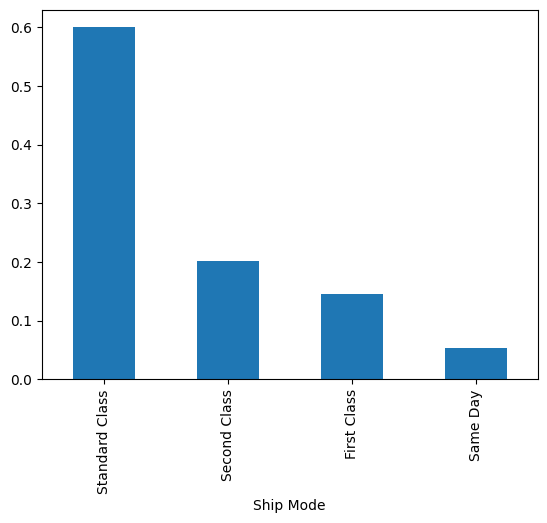

In [ ]:
# Returns a bar plot for Ship Mode
data = df['Ship Mode'].value_counts(ascending=False, normalize=True)
data.plot.bar();

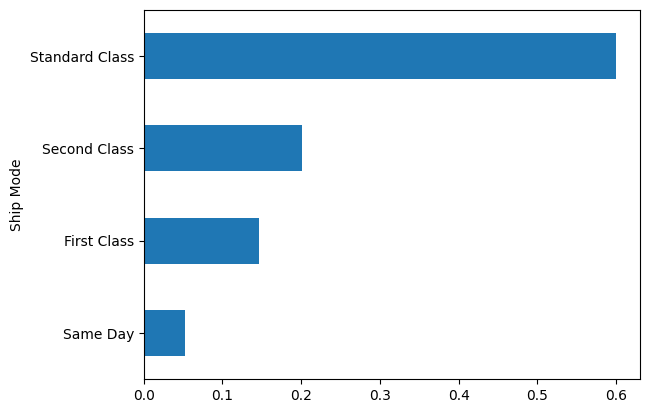

In [ ]:
# Returns a horizontal bar plot for Ship Mode
data = df['Ship Mode'].value_counts(ascending=True, normalize=True)
data.plot.barh();

Standard Class is the most used shipping method at 60%, followed by Second Class at 20%, First Class at 15% and Same Day at 5%.

In [ ]:
# Returns the data percentages for Segment
data = df.Segment.value_counts(ascending=True, normalize=True)
data

Segment
Home Office   0.18
Corporate     0.30
Consumer      0.52
Name: proportion, dtype: float64

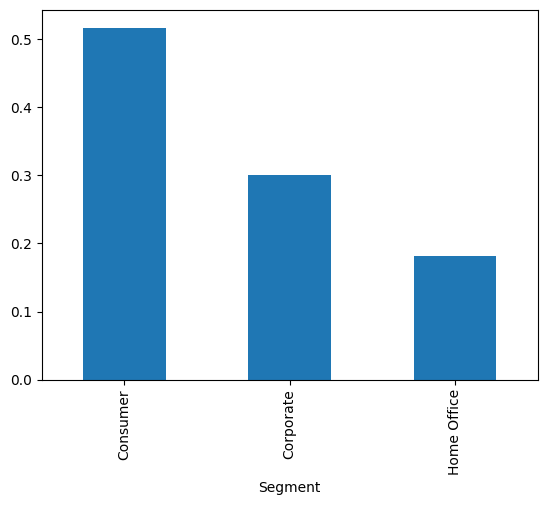

In [ ]:
# Returns a bar plot for Segment
data = df.Segment.value_counts(ascending=False, normalize=True)
data.plot.bar();

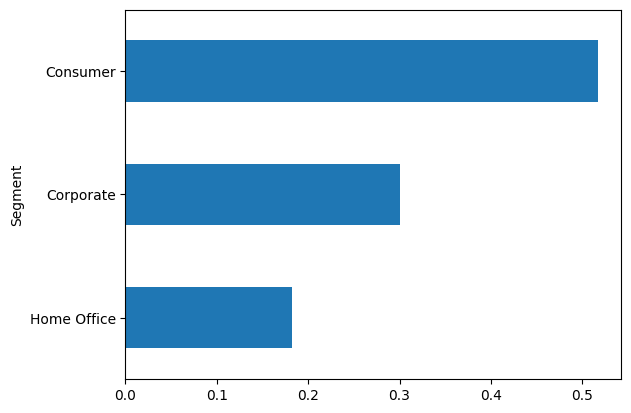

In [ ]:
# Returns a horizontal bar plot for Segment
data = df.Segment.value_counts(ascending=True, normalize=True)
data.plot.barh();

The largest market segment is Consumers who make up 52% of products sold.                                                                                                                                                                                                                                                       

In [ ]:
# Returns the data percentages for Regions
data = df.Region.value_counts(ascending=True, normalize=True)
data

Region
Central Asia        0.00
Canada              0.01
Southern Africa     0.01
Central Africa      0.01
Eastern Africa      0.01
North Africa        0.02
Western Africa      0.03
Eastern Europe      0.03
Southern US         0.03
Caribbean           0.03
Southern Europe     0.04
Northern Europe     0.04
Central US          0.05
Eastern Asia        0.05
Western Asia        0.05
Southern Asia       0.05
Eastern US          0.06
South America       0.06
Southeastern Asia   0.06
Western US          0.06
Oceania             0.07
Central America     0.11
Western Europe      0.11
Name: proportion, dtype: float64

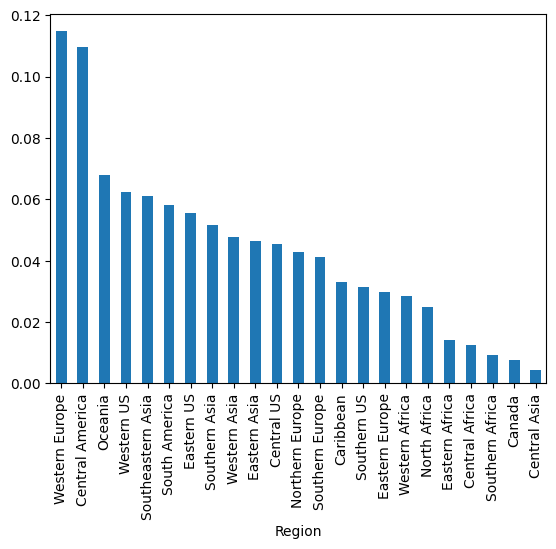

In [ ]:
# Returns a bar plot for Region
data = df.Region.value_counts(ascending=False, normalize=True)
data.plot.bar();

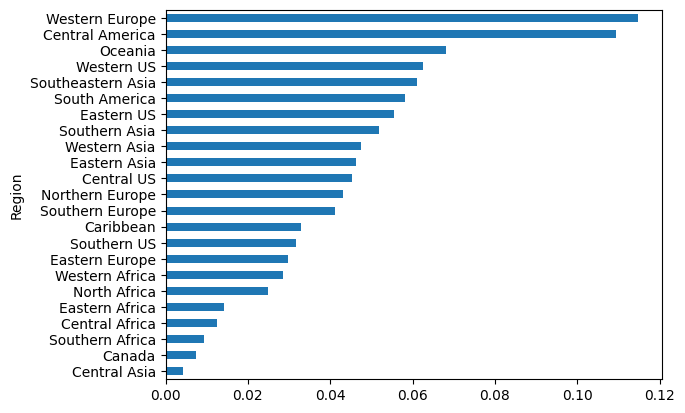

In [ ]:
# Returns a horizontal bar plot for Region
data = df.Region.value_counts(ascending=True, normalize=True)
data.plot.barh();

A large majority of Superstore's clientele order from Western Europe and Central America.

In [ ]:
# Returns the data percentages for Market
data = df.Market.value_counts(ascending=True, normalize=True)
data

Market
Africa         0.09
LATAM          0.20
USCA           0.20
Europe         0.23
Asia Pacific   0.28
Name: proportion, dtype: float64

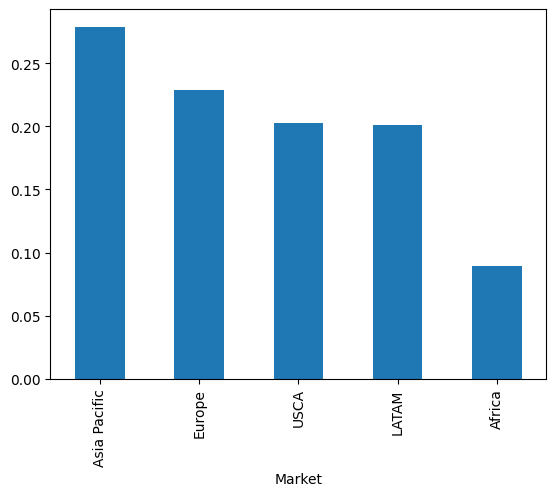

In [ ]:
# Returns a bar plot for Market
data = df.Market.value_counts(ascending=False, normalize=True)
data.plot.bar();

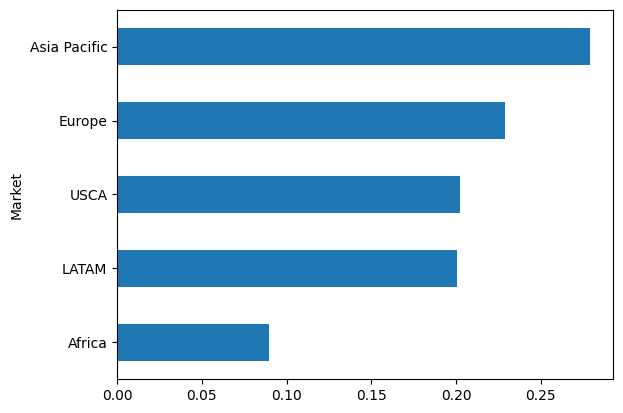

In [ ]:
# Returns a horizontal bar plot for Market
data = df.Market.value_counts(ascending=True, normalize=True)
data.plot.barh();

Superstore's Market consists of 28% Asia Pacific, 23% Europe, 20% USCA (United States), 20% LATAM (Latin America), and 9% Africa.  

In [ ]:
# Returns the data percentages for Category
data = df.Category.value_counts(ascending=True, normalize=True)
data

Category
Furniture         0.19
Technology        0.20
Office Supplies   0.61
Name: proportion, dtype: float64

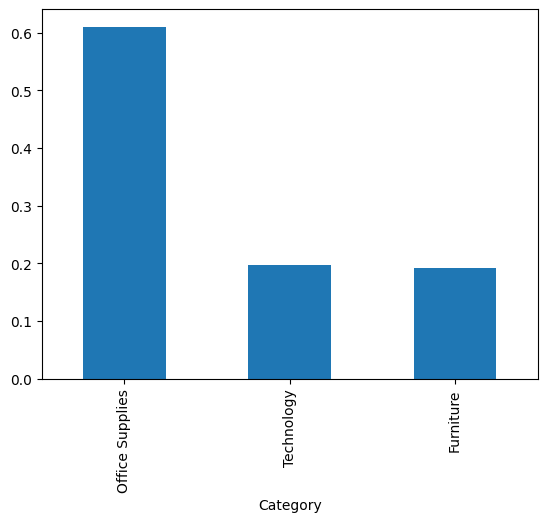

In [ ]:
# Returns a bar plot for Category
data = df.Category.value_counts(ascending=False, normalize=True)
data.plot.bar();

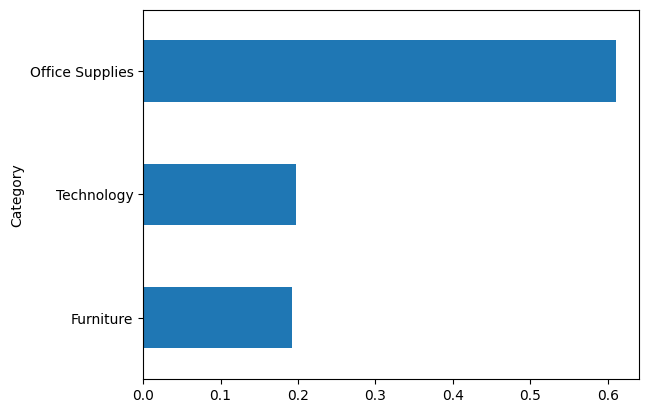

In [ ]:
# Returns a horizontal bar plot for Category
data = df.Category.value_counts(ascending=True, normalize=True)
data.plot.barh();

Office supplies make 61% of the total sales for Superstore. Technology is 20% and furniture is 19%.

In [ ]:
# Returns the data percentages for Sub-Category
data = df['Sub-Category'].value_counts(ascending=False, normalize=True)
data

Sub-Category
Binders       0.12
Storage       0.10
Art           0.09
Paper         0.07
Chairs        0.07
Phones        0.07
Furnishings   0.06
Accessories   0.06
Labels        0.05
Fasteners     0.05
Bookcases     0.05
Supplies      0.05
Envelopes     0.05
Copiers       0.04
Appliances    0.03
Machines      0.03
Tables        0.02
Name: proportion, dtype: float64

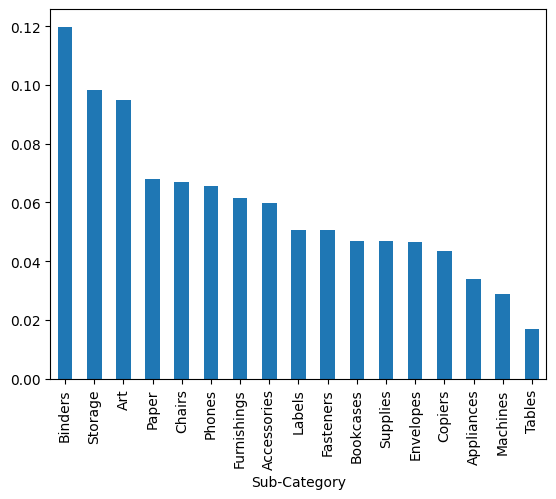

In [ ]:
# Returns a bar plot for Sub-Category
data = df['Sub-Category'].value_counts(ascending=False, normalize=True)
data.plot.bar();

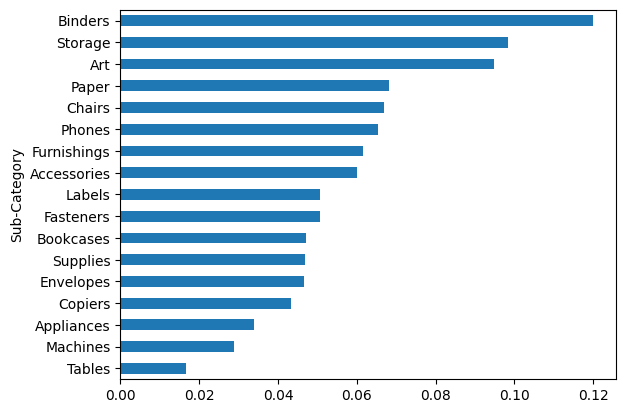

In [ ]:
# Returns a horizontal bar plot for Sub-Category
data = df['Sub-Category'].value_counts(ascending=True, normalize=True)
data.plot.barh();

The top 5 products Superstore sell are binders, storage items, art, paper, and chairs.

In [ ]:
# Returns the data percentages for Order Priority
data = df['Order Priority'].value_counts(ascending=False, normalize=True)
data

Order Priority
Medium     0.57
High       0.30
Critical   0.08
Low        0.05
Name: proportion, dtype: float64

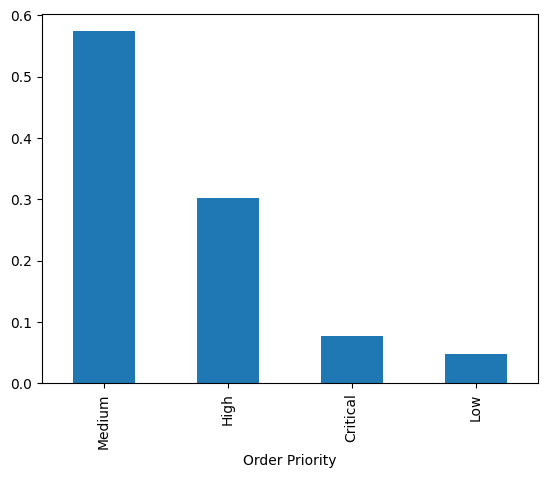

In [ ]:
# Returns a bar plot for Order Priority
data = df['Order Priority'].value_counts(ascending=False, normalize=True)
data.plot.bar();

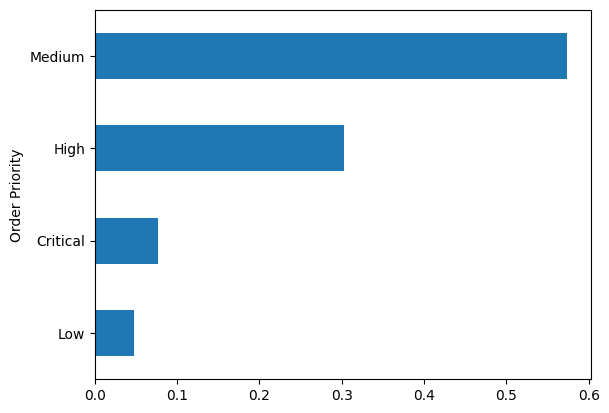

In [ ]:
# Returns a horizontal bar plot for Order Priority
data = df['Order Priority'].value_counts(ascending=True, normalize=True)
data.plot.barh();

Superstore sees most of its orders as medium priority at 57%. Next is high at 30%. Critical at 8% and low being the least utliized at 5%.

# Superstore Visualization Part 2: Bar Charts And Scientific Notation

## Bar Charts with Data

Segment
Consumer      6,507,949.43
Corporate     3,824,697.55
Home Office   2,309,855.07
Name: Sales, dtype: float64



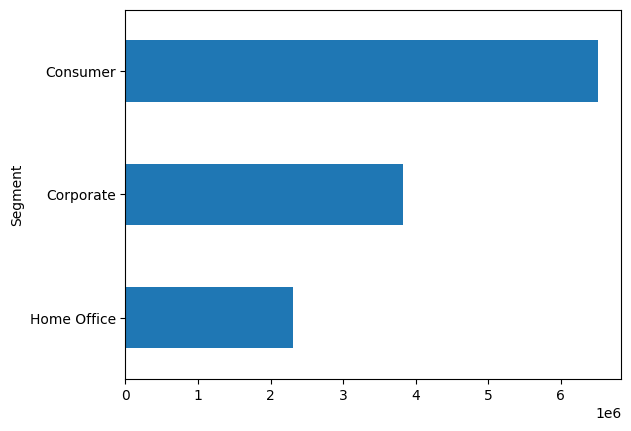

In [ ]:
# Returns the sum of Sales by Segment
data = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
print(data)
print()

# Returns horizontal bar graph of the sum of Sales by Segment
data = df.groupby('Segment')['Sales'].sum().sort_values(ascending=True)
data.plot.barh();

Consumer accounts saw the greatest amount of sales with over 6.5 million. Corporate consists of roughly 3.8 million and home office 2.3 million.

Region
Western Europe      1,731,929.70
Central America     1,223,100.79
Oceania             1,100,184.44
Southeastern Asia     884,423.35
Southern Asia         866,572.71
Eastern Asia          855,059.37
Western US            725,457.80
Eastern US            678,781.31
Northern Europe       636,779.16
South America         617,223.64
Southern Europe       608,593.98
Central US            501,239.76
Southern US           391,721.87
Caribbean             324,280.88
Western Asia          317,106.94
Eastern Europe        310,033.44
North Africa          233,216.61
Western Africa        173,878.83
Central Africa        143,630.01
Eastern Africa        127,856.05
Southern Africa       105,191.76
Canada                 66,928.17
Central Asia           19,311.48
Name: Sales, dtype: float64



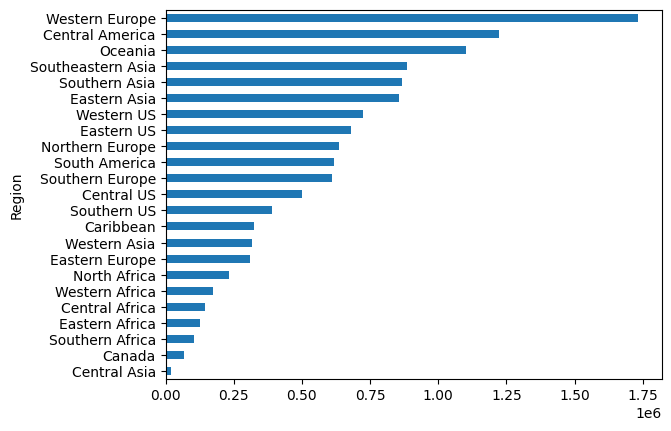

In [ ]:
# Returns sum of Sales by Region
data = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(data)
print()

# Returns horizontal bar graph of the sum of Sales by Region
data = df.groupby('Region')['Sales'].sum().sort_values(ascending=True)
data.plot.barh();

The top 3 regions with the most sales made are Western Europe with 1.7 million, Central America 1.3 million, and Oceania with 1.1 million.

Market
Asia Pacific   4,042,658.29
Europe         3,287,336.28
USCA           2,364,128.91
LATAM          2,164,605.31
Africa           783,773.26
Name: Sales, dtype: float64



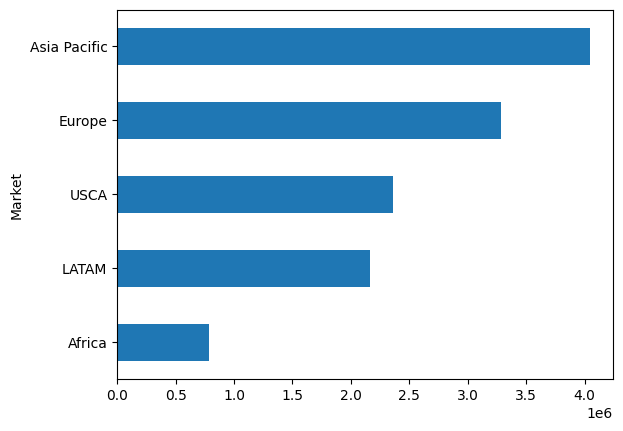

In [ ]:
# Returns the sum of Sales by Market
data = df.groupby('Market')['Sales'].sum().sort_values(ascending=False)
print(data)
print()

# Returns horizontal bar graph the sum of Sales by Market
data = df.groupby('Market')['Sales'].sum().sort_values(ascending=True)
data.plot.barh();

For markets, results show Asia Pacific has the most sales at 4 million. Followed by Europe with 3.2 million, USCA with 2.3 million, LATAM with 2.1 million and Africa 783 thousand.

Category
Technology        4,744,557.66
Furniture         4,110,451.81
Office Supplies   3,787,492.58
Name: Sales, dtype: float64



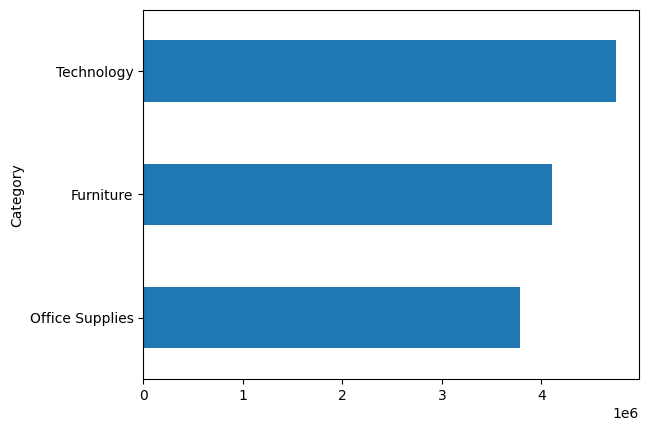

In [ ]:
# Returns the sum of Sales by Category
data = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(data)
print()

# Returns the bar graph of Sales by Category
data = df.groupby('Category')['Sales'].sum().sort_values(ascending=True)
data.plot.barh();

In terms of sales, results show technology based products sell the most at 4.7 million, then furniture at 4.1 miilion, and office supplies 3.7 million.

Sub-Category
Phones        1,706,824.19
Copiers       1,509,436.31
Chairs        1,501,681.85
Bookcases     1,466,572.11
Storage       1,126,812.98
Appliances    1,010,535.57
Machines        779,060.14
Tables          757,041.89
Accessories     749,237.02
Binders         461,869.58
Furnishings     385,155.96
Art             371,613.25
Supplies        242,811.03
Paper           241,787.52
Envelopes       169,217.35
Fasteners        89,494.98
Labels           73,350.32
Name: Sales, dtype: float64



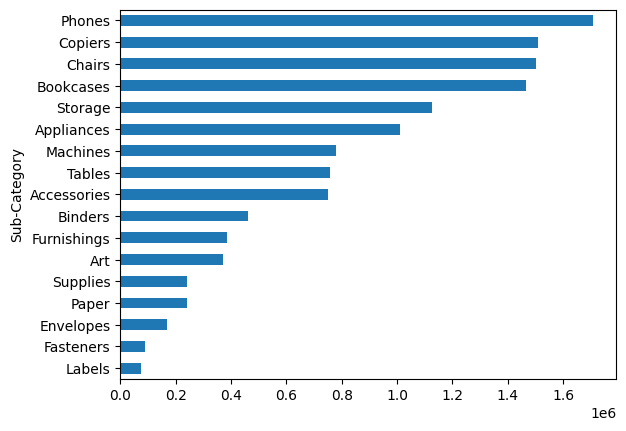

In [ ]:
# Returns sum of Sales by Sub-Category
data = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
print(data)
print()

# Return bar graph of Sales by Sub-Category
data = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=True)
data.plot.barh();

Superstore saw 1.7 million in sales of phones,  1.5 million in sales of chairs, 1.4 million in bookcases, 1.1 million in storage and 1 million in appliances.